In [2]:
import csv 
import numpy as np 
import pandas as pd
with open("height.csv",'w') as f:
    writer = csv.writer(f)
    writer.writerows([["Mother height","daughter height"],[58,60],[60,60],[62,58],[64,60],[67,70],[70,72]])

In [4]:
data = pd.read_csv("height.csv")


,Mother height,daughter height
0,58,60
1,60,60
2,62,58
3,64,60
4,67,70
5,70,72


In [ ]:
m = 0
c = 0

L = 0.0001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent

n = float(len(X)) # Number of elements in X
X = np.array(X)
print(X.shape)

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*X + c  # The current predicted value of Y
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
print (m, c)

Y_pred = m*X + c

plt.scatter(X, Y) 
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red')  # regression line
plt.show()

In [129]:
data = pd.read_csv('height.csv')
X = data.iloc[:, 0]
Y = data.iloc[:, 1]
# def normalize(data):
#     return (data-data.mean())/data.std()
class LinearRegression:
    def __init__(self,X,Y):
        self.X = X
        self.y = Y
        self.n = float(len(self.X))
        self.m = 0
        self.c = 0
    def run(self,lr,epochs):
        for epoch in range(epochs):
            Y_pred = self.m*self.X +self.c
            dm =(-2/self.n) * sum(X * (Y - Y_pred))
            db =(-2/self.n) * sum(Y - Y_pred)
            self.m-=lr*dm
            self.c-=lr*db
model = LinearRegression(X,Y)
model.run(0.0001,2000)
print (model.m, model.c)
Y_pred = model.m*X + model.c


0.9980946417779742 -0.0018825558289071805


In [131]:
rmse = np.mean(np.sqrt((Y-Y_pred)**2))
mse = np.mean((Y-Y_pred)**2)
print("MSE : ",mse)
print("RMSE : ",rmse)
print(model.m*63+model.c)

MSE :  8.151346465577989
RMSE :  2.5415927203831927
62.87807987618347


In [132]:
with open("StudyHours.csv",'w') as f:
    writer = csv.writer(f)
    writer.writerows([["Hours of Study","Pass"],[1,0],[2,0],[3,0],[4,0],[5,1],[6,1],[7,1],[8,1]])


In [162]:
data = pd.read_csv('StudyHours.csv')
X = data.iloc[:, 0]
Y = data.iloc[:, 1]

class LogisticRegression:
    def __init__(self,X,Y):
        self.X = np.array(X)
        self.Y = np.array(Y)
        self.n = len(self.X)
        self.m = 0
        self.b = 0
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    def predict(self,X):
        return self.sigmoid(X*self.m + self.b)
    def loss(self,Y_pred):
        return -sum(self.Y*np.log(Y_pred)+(1-self.Y)*np.log(1-Y_pred))/self.n
    def run(self,lr,epochs):
        for epoch in range(epochs):
            Y_pred = self.sigmoid(self.X*self.m + self.b)
            dm = (-2/self.n)*sum(Y_pred*(1-Y_pred)*self.X*(self.Y-Y_pred))
            db = (-2/self.n)*sum(Y_pred*(1-Y_pred)*(self.Y-Y_pred))
            self.m-=lr*dm
            self.b-=lr*db
            loss = -sum(self.Y*np.log(Y_pred)+(1-self.Y)*np.log(1-Y_pred))/self.n
            print(f"loss = {loss}")

model = LogisticRegression(X,Y)
model.run(0.8,100000)
print (model.m, model.b)          
    

loss = 0.6931471805599453
loss = 0.7055061811526782
loss = 0.5944194753292544
loss = 0.5857892343771818
loss = 0.5722562886603741
loss = 0.5670814832131582
loss = 0.5513365941723507
loss = 0.5524787390285314
loss = 0.5331993459536996
loss = 0.5439679812695347
loss = 0.5224886294407394
loss = 0.5371606033412852
loss = 0.5167676325982998
loss = 0.5214700903151155
loss = 0.500214641254625
loss = 0.5058786336062352
loss = 0.48367797108878147
loss = 0.49131416612297985
loss = 0.4683727136789096
loss = 0.4774890713731956
loss = 0.4540064695715149
loss = 0.4643841918667876
loss = 0.44060178589174454
loss = 0.4519401497136056
loss = 0.4281327156959618
loss = 0.44010574997145147
loss = 0.4165772420498567
loss = 0.42883630331283434
loss = 0.40591362839891093
loss = 0.4180957769095515
loss = 0.3961198915228804
loss = 0.407858877074484
loss = 0.3871719096723971
loss = 0.3981129044336896
loss = 0.37903988760381196
loss = 0.3888587937138502
loss = 0.37168314938713687
loss = 0.38011031238528104
loss 

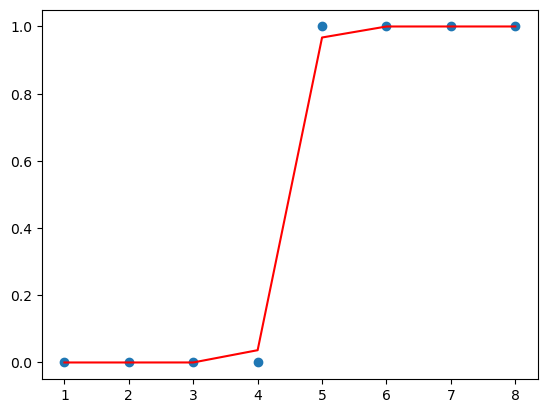

In [163]:
Y_pred = model.predict(X)
plt.scatter(X, Y) 
plt.plot(X,Y_pred, color='red')  # regression line

In [164]:
#Testing 
threshold = 0.5
a = 3.5
b = 7.5
y = model.predict(a)
loss = model.loss(y)
print("Model loss for a: ",loss)
print(f"pass after {a} of study: ",0 if y<threshold else 1)
y = model.predict(b)
loss = model.loss(y)

print("Model loss for b: ",loss)
print(f"pass after {a} of study: ",0 if y<threshold else 1)

Model loss for a:  3.3006376774756774
pass after 3.5 of study:  0
Model loss for b:  10.00994069338385
pass after 3.5 of study:  1


In [155]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
data = pd.read_csv('StudyHours.csv')
X = np.array(data.iloc[:, 0].values).reshape(-1, 1)
Y = np.array(data.iloc[:, 1].values).reshape(-1, 1)
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print the coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [[1.01750279]]
Intercept: [-4.4350521]


In [125]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
data = pd.read_csv('height.csv')
X = np.array(data.iloc[:, 0].values).reshape(-1, 1)
Y = np.array(data.iloc[:, 1].values).reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
Y_pred = model.predict(X_test)

Coefficients: [[0.97435897]]
Intercept: [1.84615385]


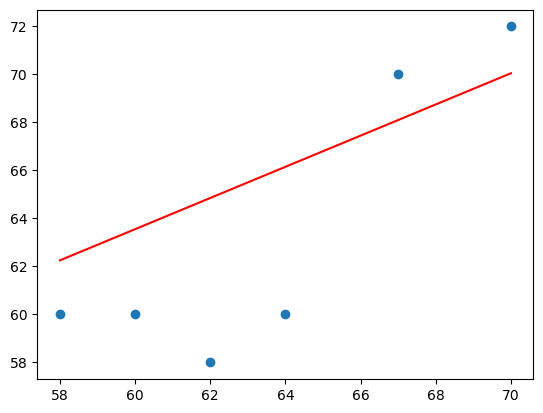

In [126]:
plt.scatter(X, Y) 
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red')  # regression line

In [178]:
X = np.array([[4,2,1,3,1,6],[1,8,0,2,4,7]])
Y = np.array([2,4,1,-1,-7,-8])
class MultiLogisticRegression:
    def __init__(self,X,Y):
        self.X = X
        self.Y = Y
        self.n = len(self.X)
        self.m = np.random.randn(self.n) 
        self.b = 0
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    def predict(self,X):
        return self.sigmoid(np.dot(X.T,self.m) + self.b)
    def loss(self,Y_pred):
        return -sum(self.Y*np.log(Y_pred)+(1-self.Y)*np.log(1-Y_pred))/self.n
    def run(self,lr,epochs):
        for epoch in range(epochs):
            Y_pred = self.predict(self.X)
            dm = (-2/self.n)*np.dot(Y_pred*(1-Y_pred)*(self.Y-Y_pred),self.X.T)
            db = (-2/self.n)*sum(Y_pred*(1-Y_pred)*(self.Y-Y_pred))
            self.m-=lr*dm
            self.b-=lr*db
            loss = -sum(self.Y*np.log(Y_pred)+(1-self.Y)*np.log(1-Y_pred))/self.n
            print(f"loss = {loss}")
model = MultiLogisticRegression(X,Y)
model.run(0.002,100)
print (model.m, model.b)       


loss = -23.807622929992682
loss = -23.803601292163002
loss = -23.799769139447214
loss = -23.7961243565597
loss = -23.79266484328454
loss = -23.789388514652526
loss = -23.78629330110588
loss = -23.783377148651507
loss = -23.780638019003007
loss = -23.778073889711546
loss = -23.775682754286297
loss = -23.77346262230444
loss = -23.77141151951121
loss = -23.769527487910324
loss = -23.767808585844932
loss = -23.76625288806955
loss = -23.764858485813225
loss = -23.763623486834195
loss = -23.762546015466256
loss = -23.761624212657367
loss = -23.76085623600043
loss = -23.760240259756753
loss = -23.759774474872348
loss = -23.75945708898738
loss = -23.759286326438946
loss = -23.75926042825745
loss = -23.759377652156875
loss = -23.759636272519053
loss = -23.76003458037234
loss = -23.76057088336471
loss = -23.761243505731663
loss = -23.76205078825899
loss = -23.762991088240817
loss = -23.764062779432944
loss = -23.765264252001572
loss = -23.766593912468096
loss = -23.768050183649528
loss = -23.769

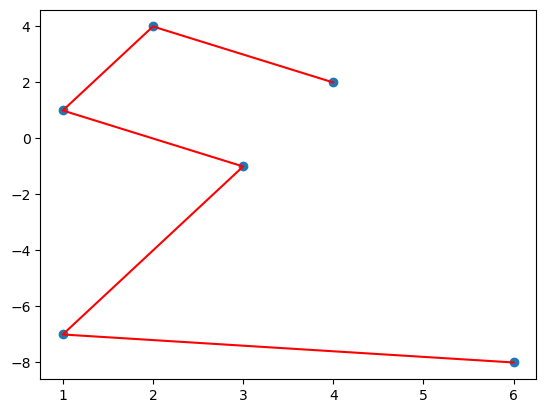

In [181]:
Y_pred = model.predict(X)
plt.scatter(X[0], Y) 
plt.plot(X[0],Y, color='red')  # regression line